#  Write the ground truth of body and head orientation ( [cam, frame, people]) 

In [2]:
#import math
import numpy as np
import matplotlib
matplotlib.use("nbagg")
import matplotlib.pyplot as plt
#from mpl_toolkits import mplot3d
import cv2
import os
from PIL import Image

import Config
import copy

import getCamM
import geoFuncs
import drawLib

%load_ext autoreload
%autoreload 2

In [3]:
#orientation in world coordinate
bodys = np.loadtxt('./GT_orien/GT_body.txt')
heads = np.loadtxt('./GT_orien/GT_head.txt')
heads = heads+bodys
#position on ground
Xs_gt = np.loadtxt('./GT_orien/GT_Xs.txt')
Ys_gt = np.loadtxt('./GT_orien/GT_Ys.txt')


#Dimension: cam, frame, people
GTs_body_camSpace = np.zeros((len(Config.cameras_list), bodys.shape[1],  bodys.shape[0]))
GTs_head_camSpace = np.zeros((len(Config.cameras_list), bodys.shape[1],  bodys.shape[0]))
GTsX_camSpace = np.zeros((len(Config.cameras_list), Xs_gt.shape[1],  Xs_gt.shape[0])) 
GTsY_camSpace = np.zeros((len(Config.cameras_list), Ys_gt.shape[1],  Ys_gt.shape[0]))

#position projected on images
#GTs_body_img = np.zeros((len(Config.cameras_list), bodys.shape[1],  bodys.shape[0])) #cam, frame, people
#GTs_head_img = np.zeros((len(Config.cameras_list), heads.shape[1],  heads.shape[0]))
#GTsX_img = np.zeros((len(Config.cameras_list), Xs_gt.shape[1],  Xs_gt.shape[0])) 
#GTsY_img = np.zeros((len(Config.cameras_list), Ys_gt.shape[1],  Ys_gt.shape[0]))

In [4]:
RzTs, rvecs, tvecs, camIs, distCs = getCamM.getCamMatrixs()

rotation [ 2.24455904 -0.08139517  0.57346381] Rz angle =  0.573463809317
rotation [ 2.2346803   0.01945033 -1.54860532] Rz angle =  -1.54860531543
rotation [ 2.21293743  0.0243497  -3.10520375] Rz angle =  -3.10520374762
rotation [ 2.24282364 -0.06320134  2.26464335] Rz angle =  2.26464335169


In [6]:
def proj2Img(pts, cam):
    rvec = rvecs[cam]
    tvec = tvecs[cam]
    camI = camIs[cam]
    distC = distCs[cam]

    outPoints = cv2.projectPoints(pts, rvec, tvec, camI, distC)
    pts_img = outPoints[0]
    return pts_img

<IPython.core.display.Javascript object>


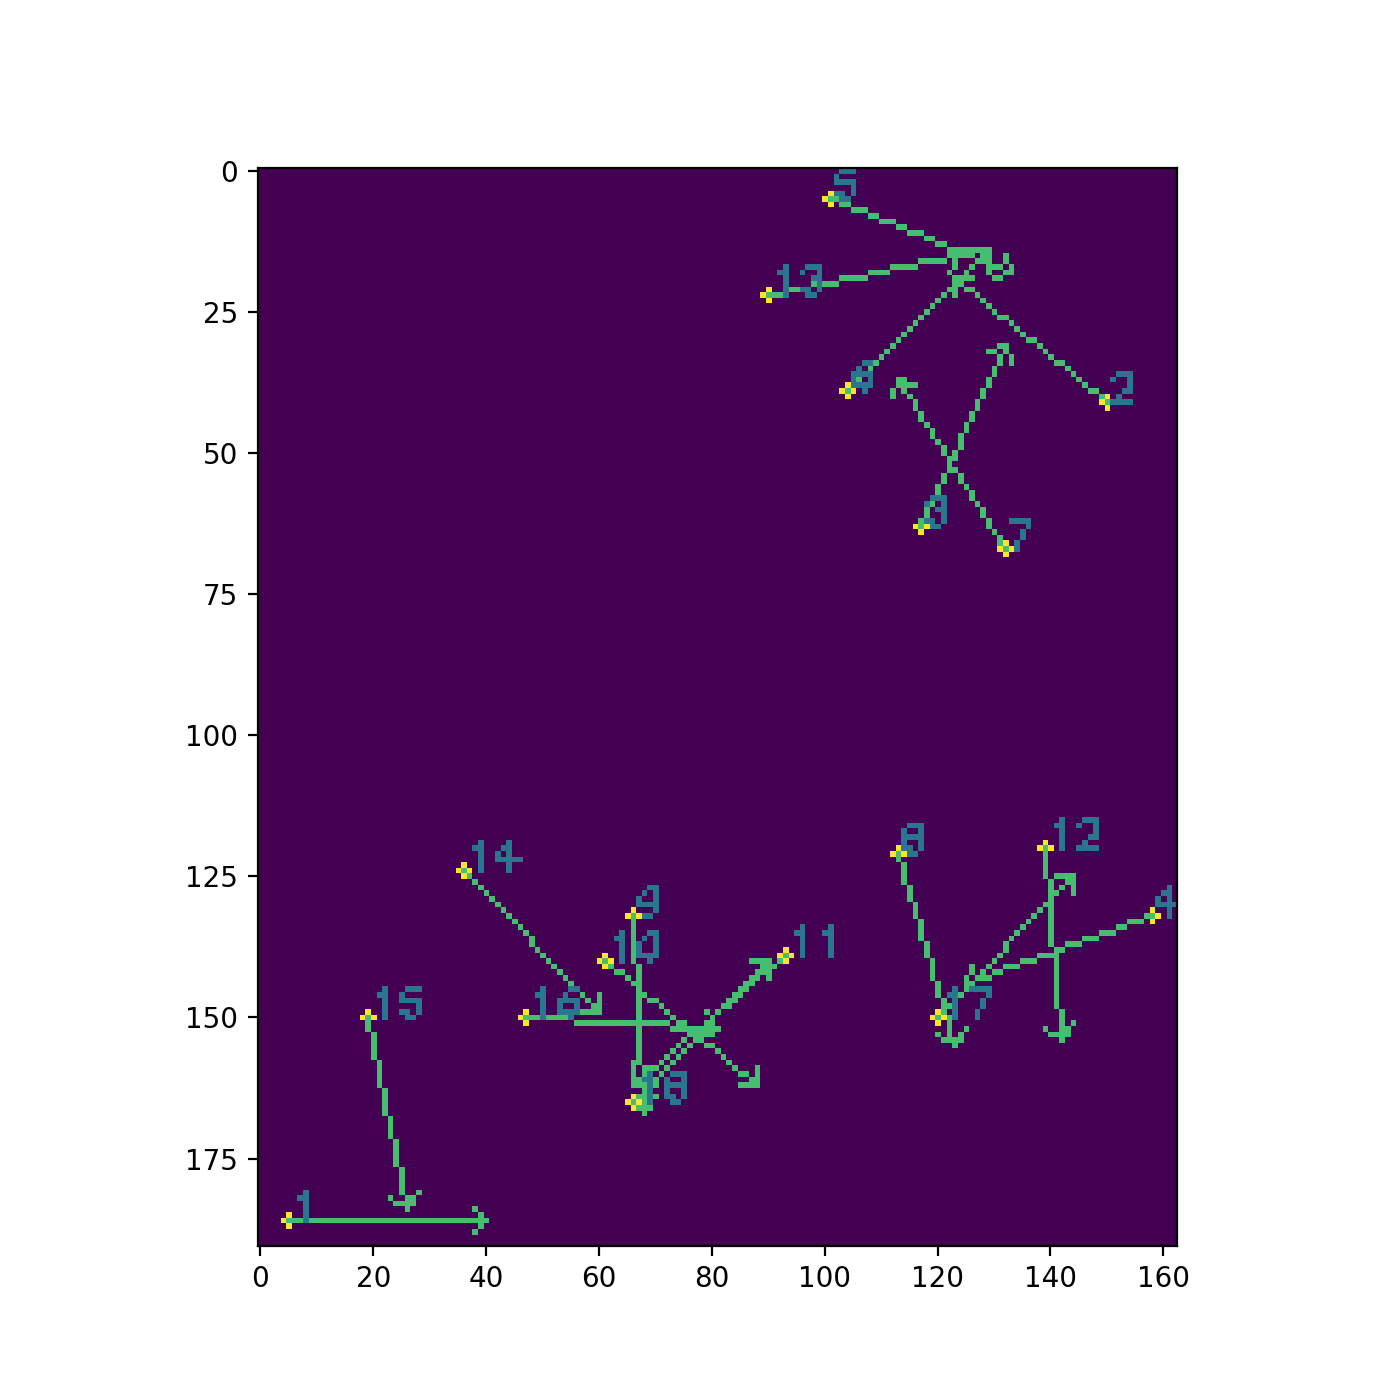

Body Orientation


<IPython.core.display.Javascript object>


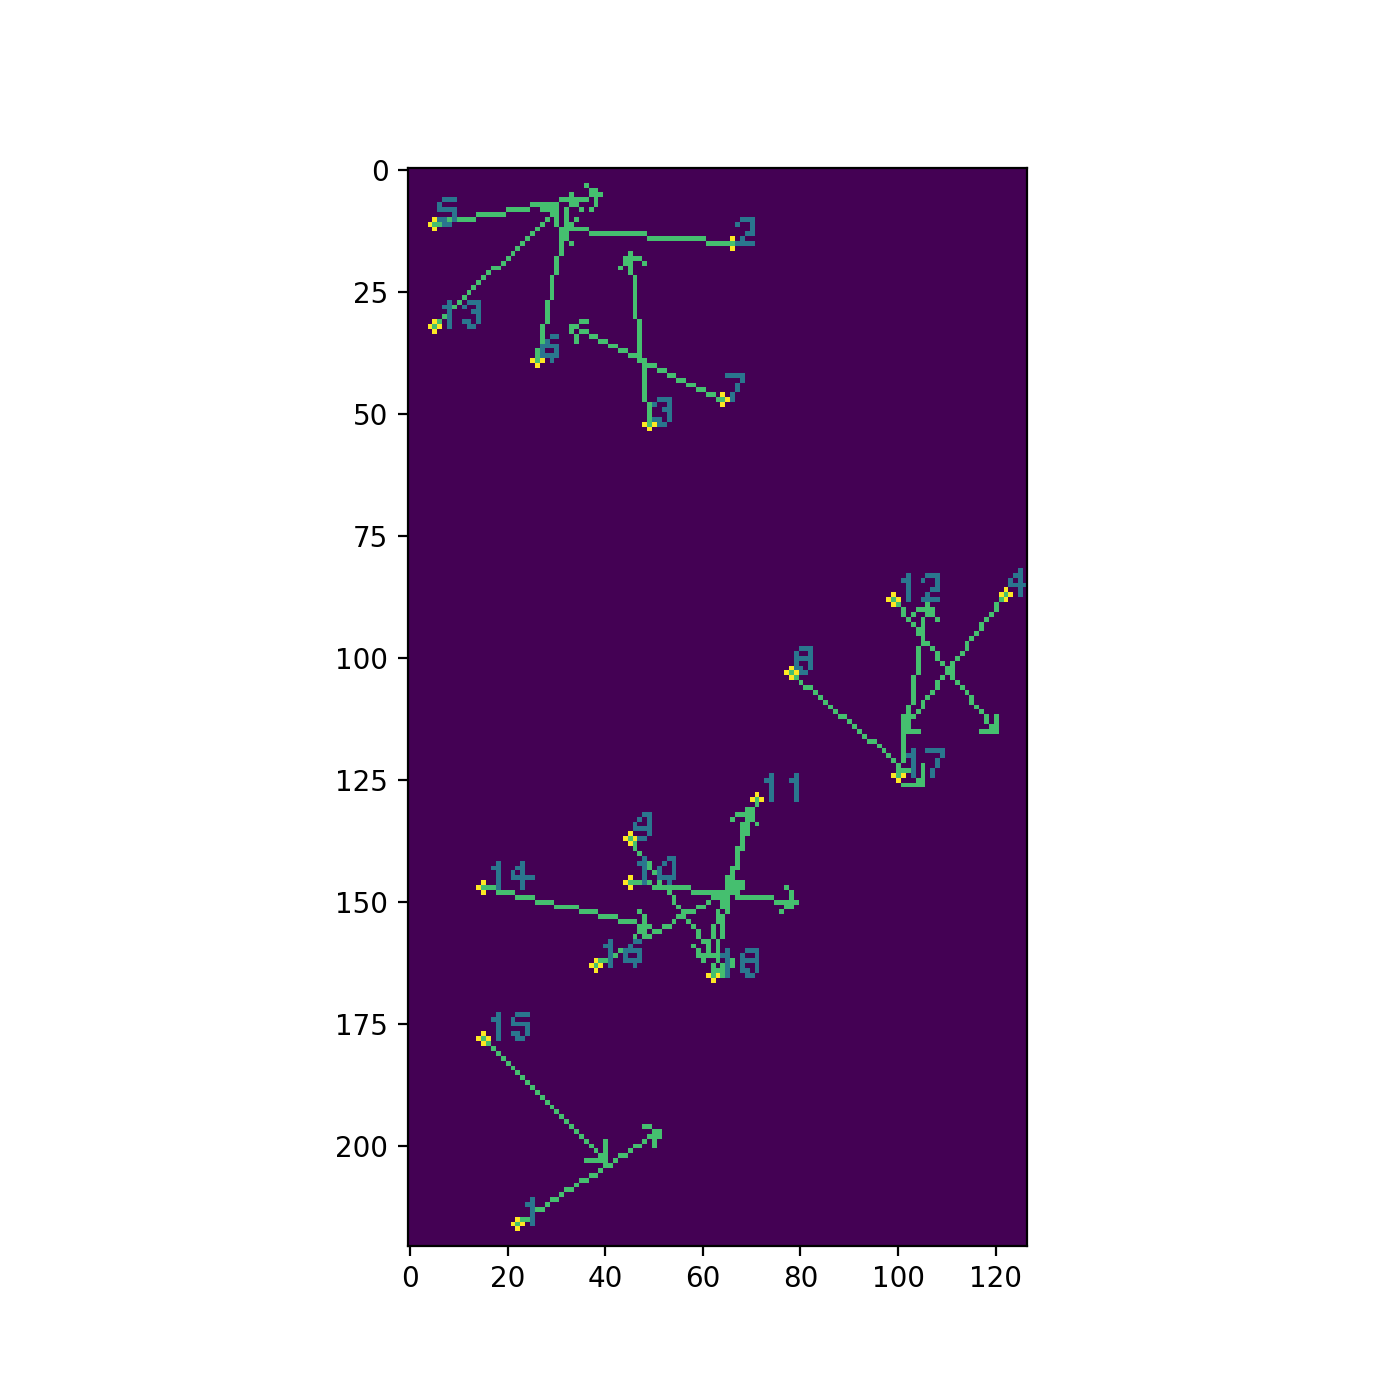

(351, 828) (200, 713)
(313, 260) (406, 247)
(339, 301) (367, 256)
(101, 383) (123, 435)
(479, 240) (387, 242)
(413, 277) (403, 240)
(299, 299) (396, 270)
(208, 401) (96, 460)
(297, 479) (179, 577)
(288, 509) (144, 526)
(203, 462) (202, 566)
(164, 376) (68, 439)
(476, 264) (410, 242)
(424, 505) (261, 539)
(414, 628) (255, 750)
(302, 569) (192, 510)
(114, 455) (140, 382)
(192, 576) (208, 467)


<IPython.core.display.Javascript object>


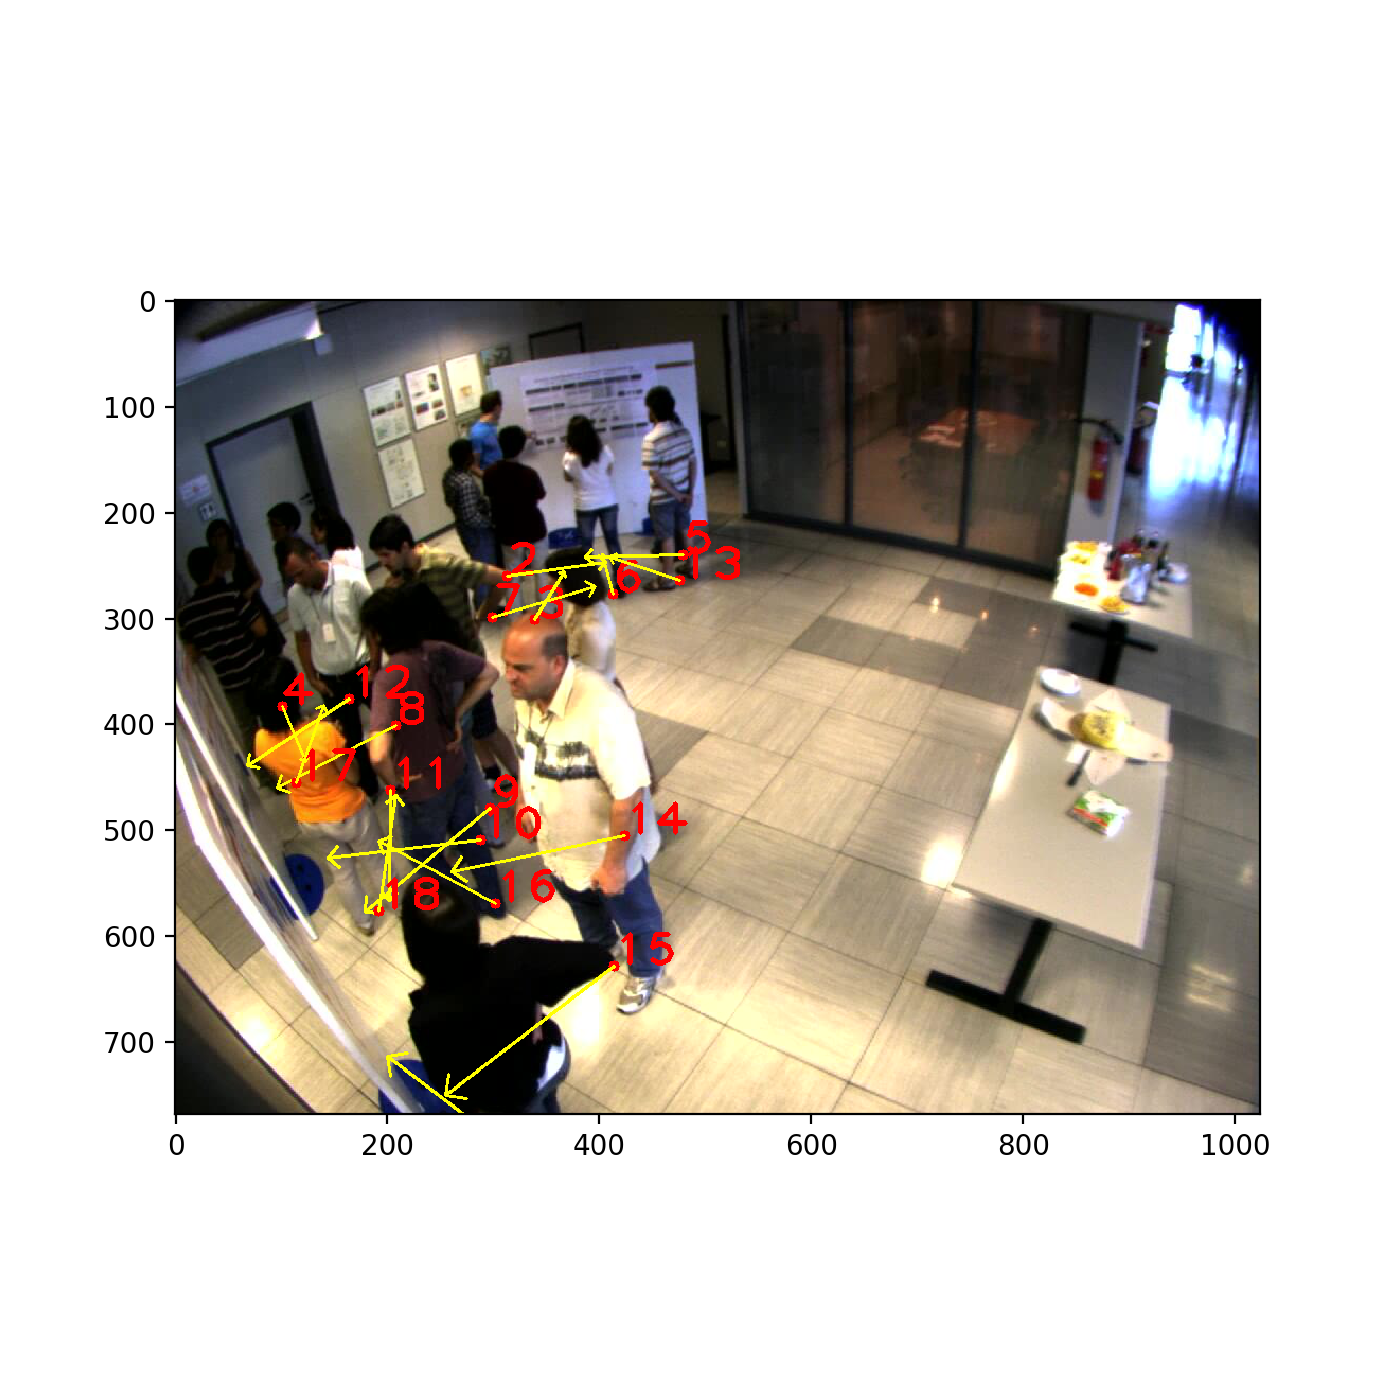

Body Orientation


<IPython.core.display.Javascript object>


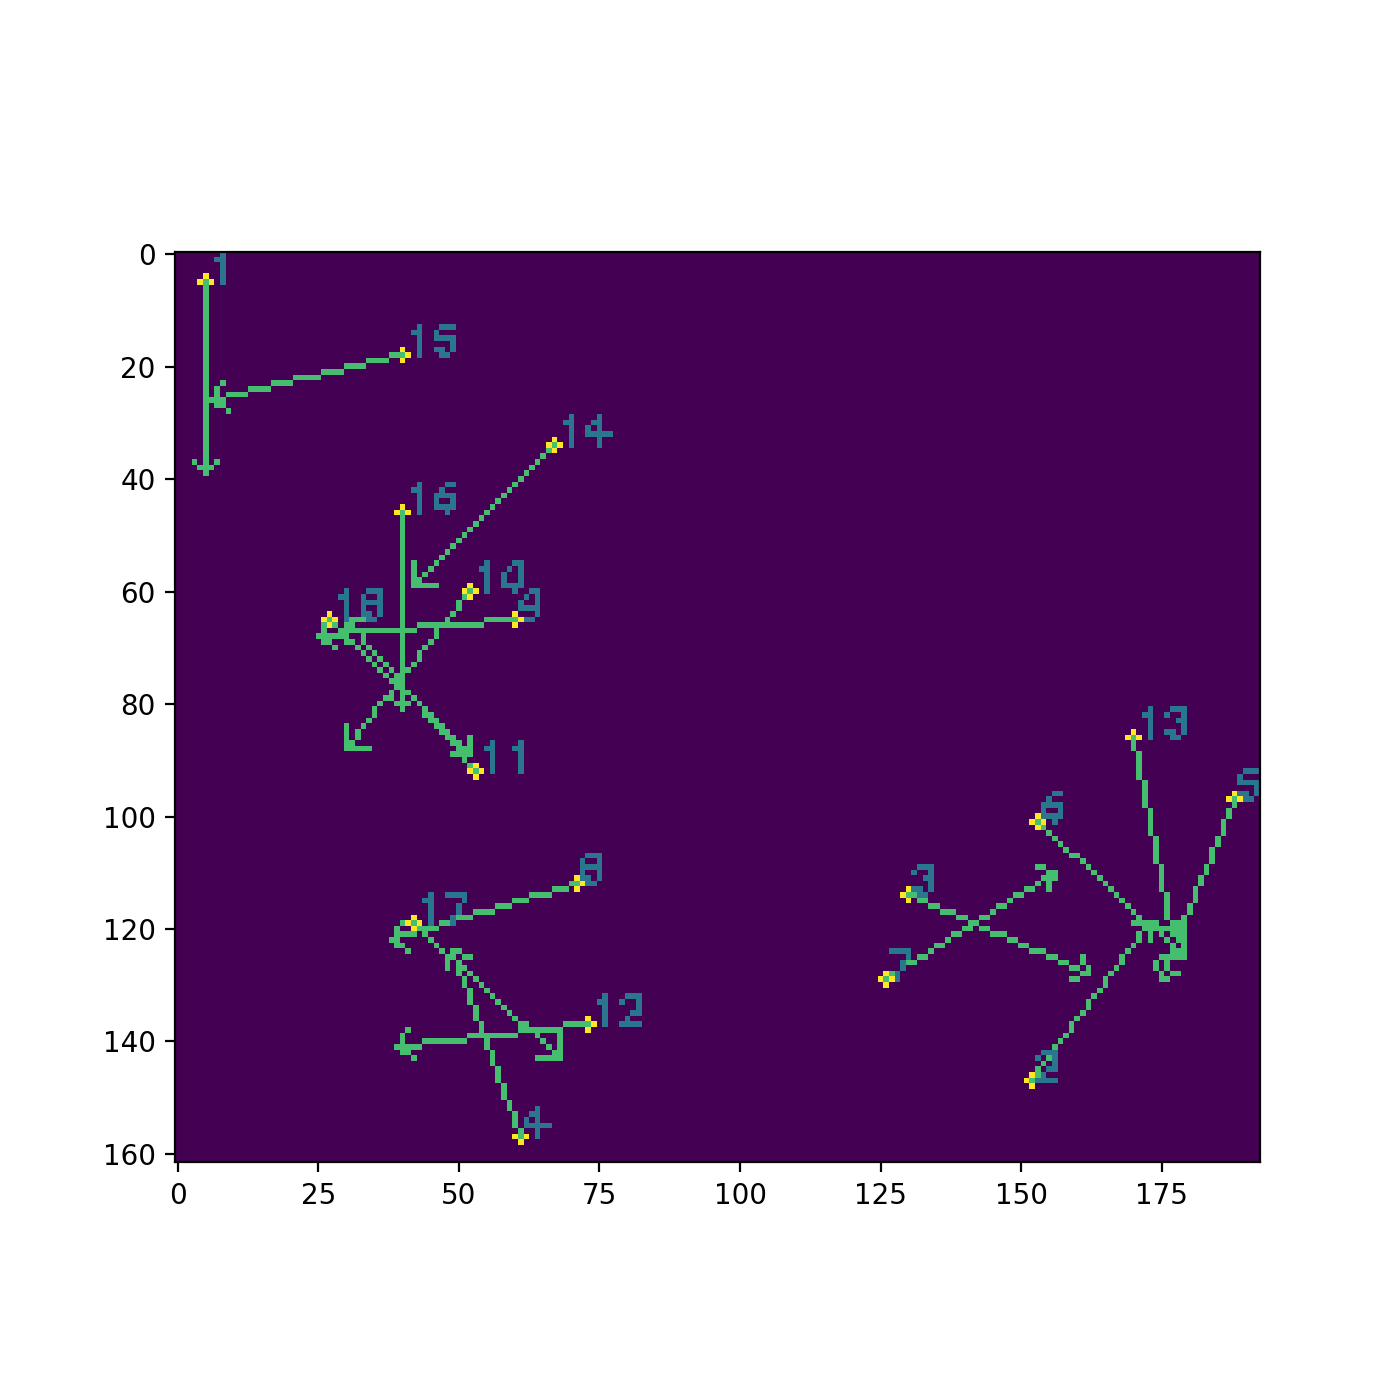

(773, 244) (802, 298)
(161, 599) (126, 483)
(311, 477) (153, 519)
(675, 678) (718, 524)
(116, 414) (101, 517)
(231, 431) (96, 500)
(312, 535) (207, 459)
(599, 477) (769, 515)
(632, 344) (765, 353)
(661, 333) (765, 403)
(674, 413) (746, 347)
(594, 580) (786, 591)
(191, 389) (107, 487)
(598, 282) (696, 333)
(678, 258) (787, 276)
(693, 305) (720, 383)
(745, 502) (629, 606)
(757, 347) (675, 406)


<IPython.core.display.Javascript object>


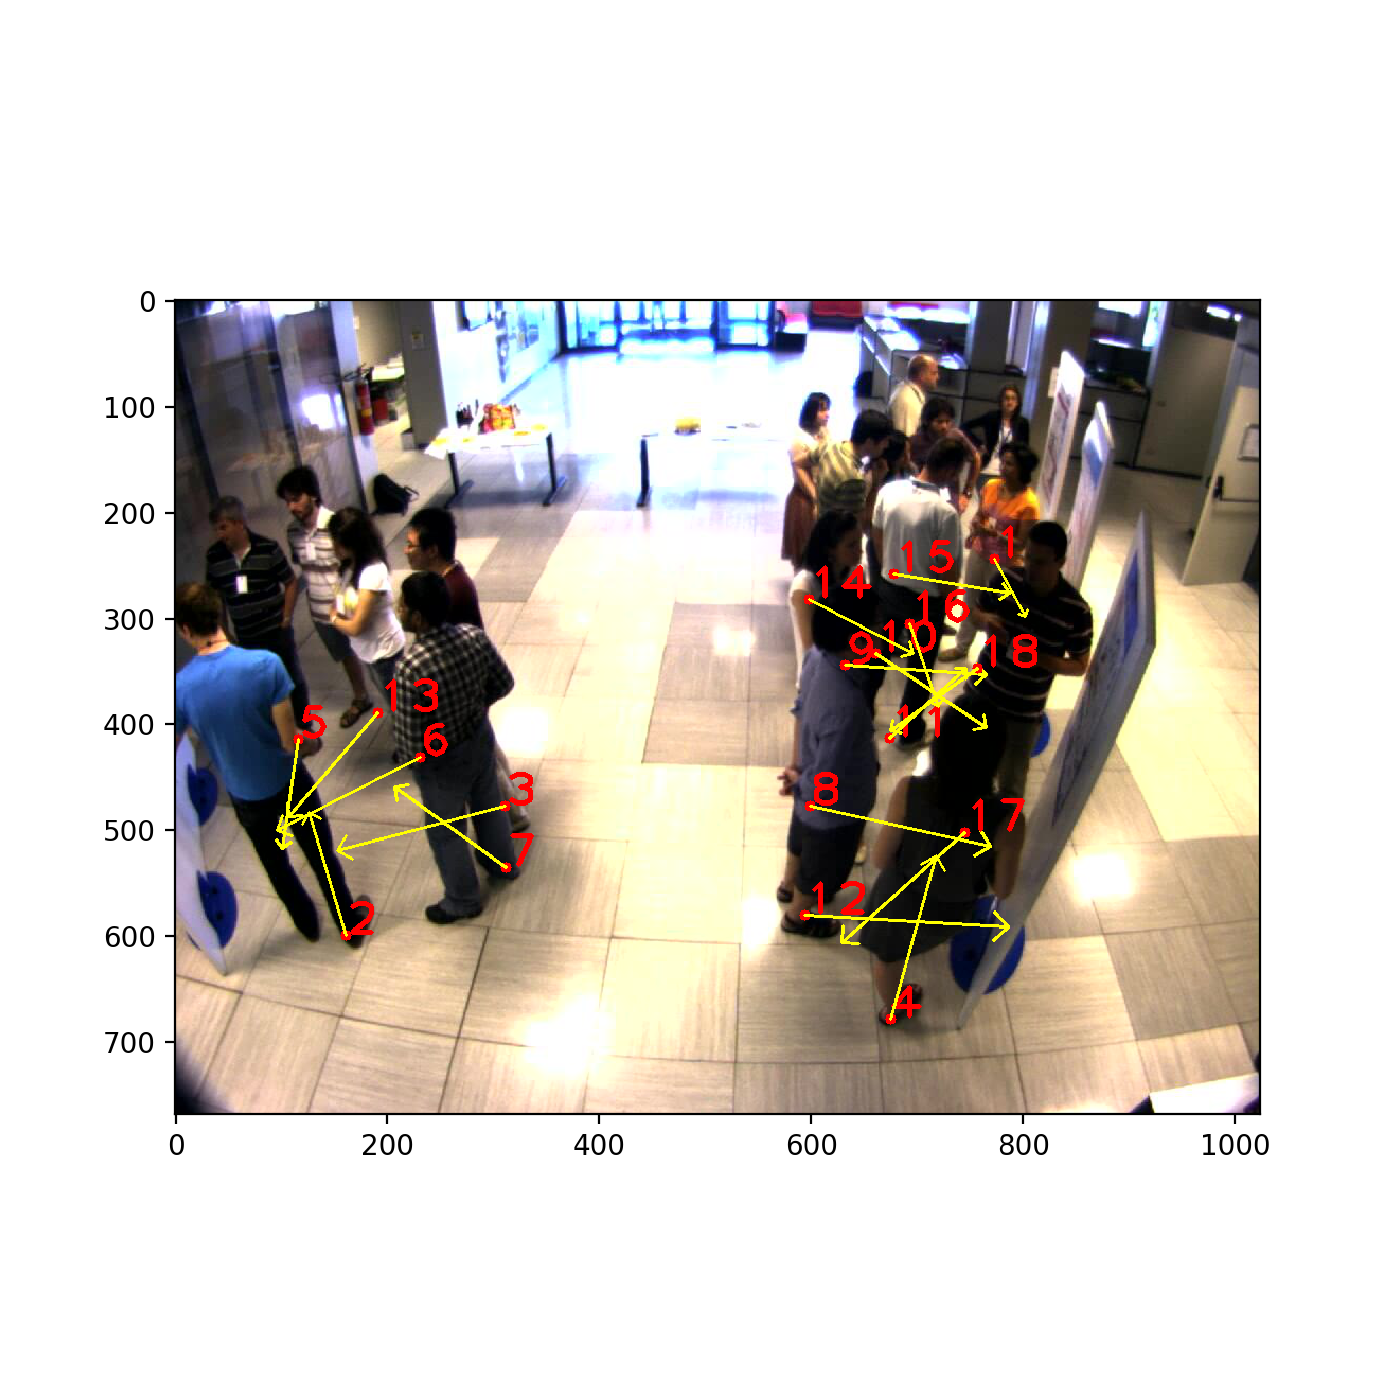

Body Orientation


<IPython.core.display.Javascript object>


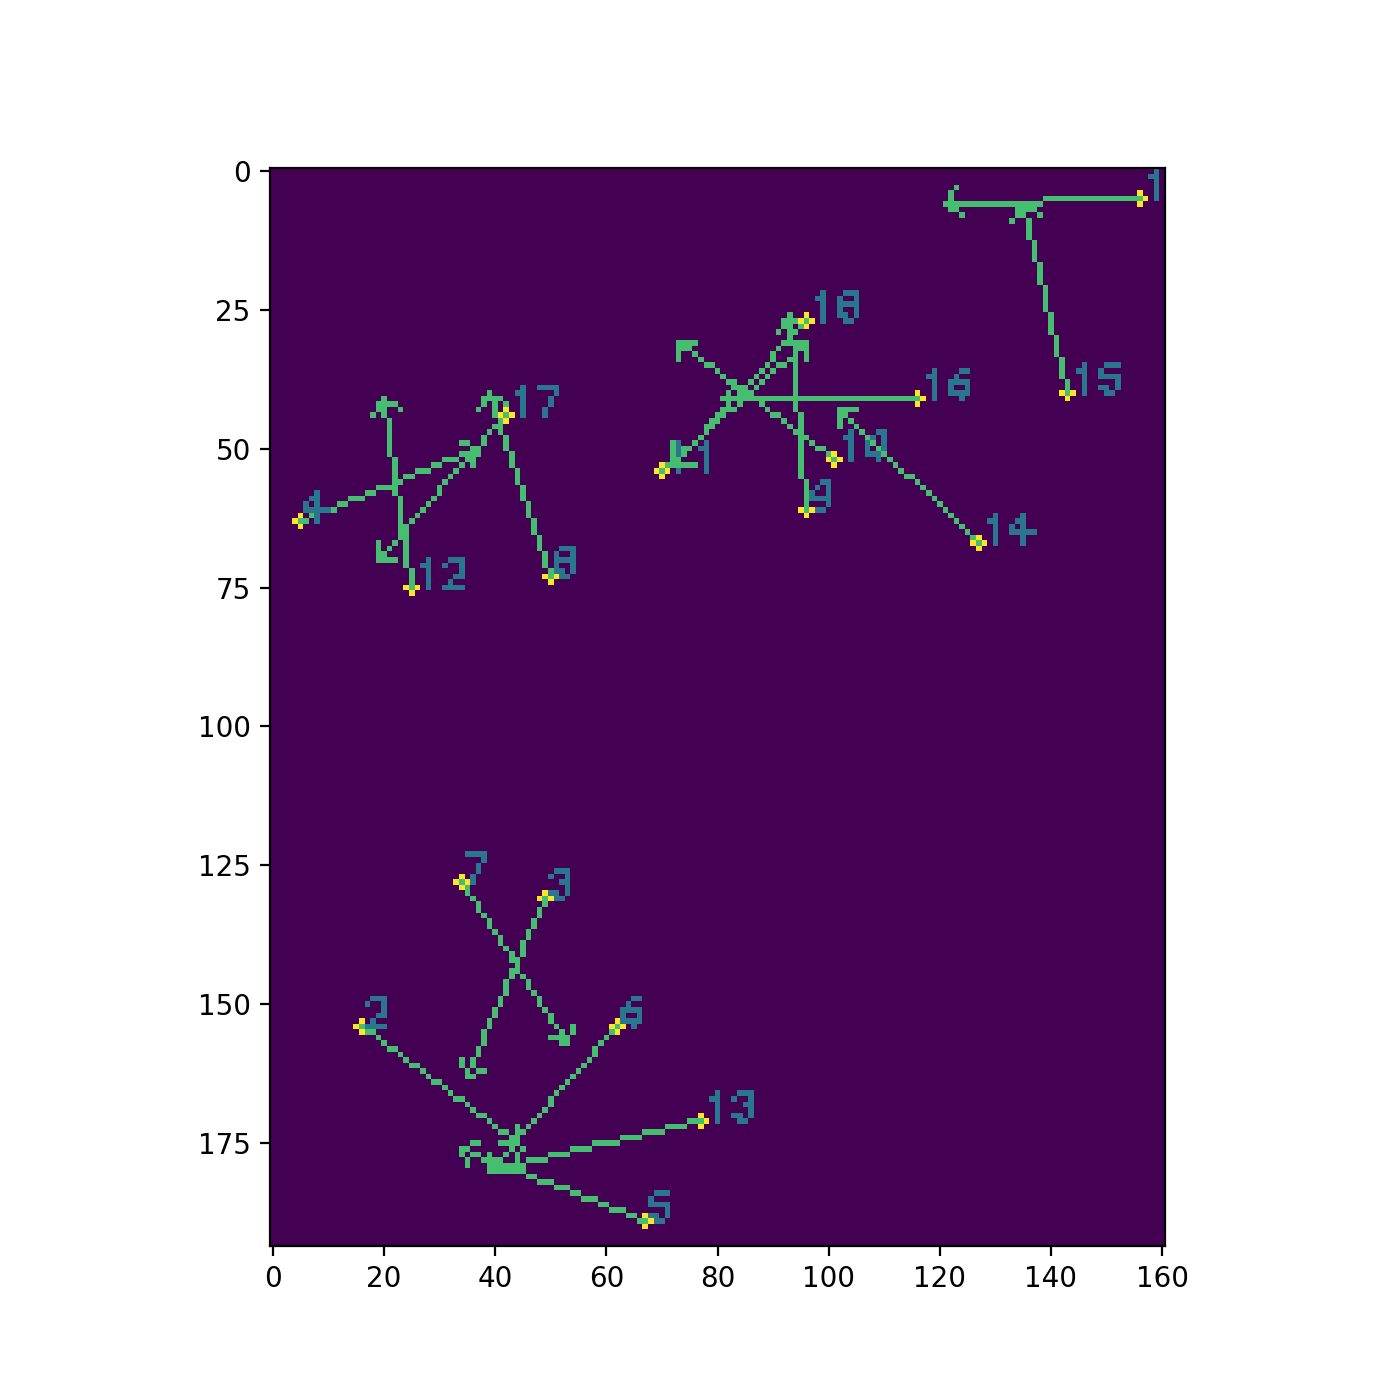

(271, 213) (363, 213)
(797, 569) (668, 679)
(613, 483) (712, 617)
(734, 307) (618, 280)
(527, 766) (730, 683)
(551, 578) (707, 706)
(683, 470) (604, 591)
(581, 320) (607, 262)
(413, 293) (435, 238)
(400, 278) (497, 247)
(507, 283) (426, 245)
(675, 328) (666, 266)
(463, 660) (680, 702)
(302, 304) (402, 263)
(276, 259) (326, 214)
(360, 260) (472, 261)
(598, 268) (691, 317)
(427, 240) (499, 282)


<IPython.core.display.Javascript object>


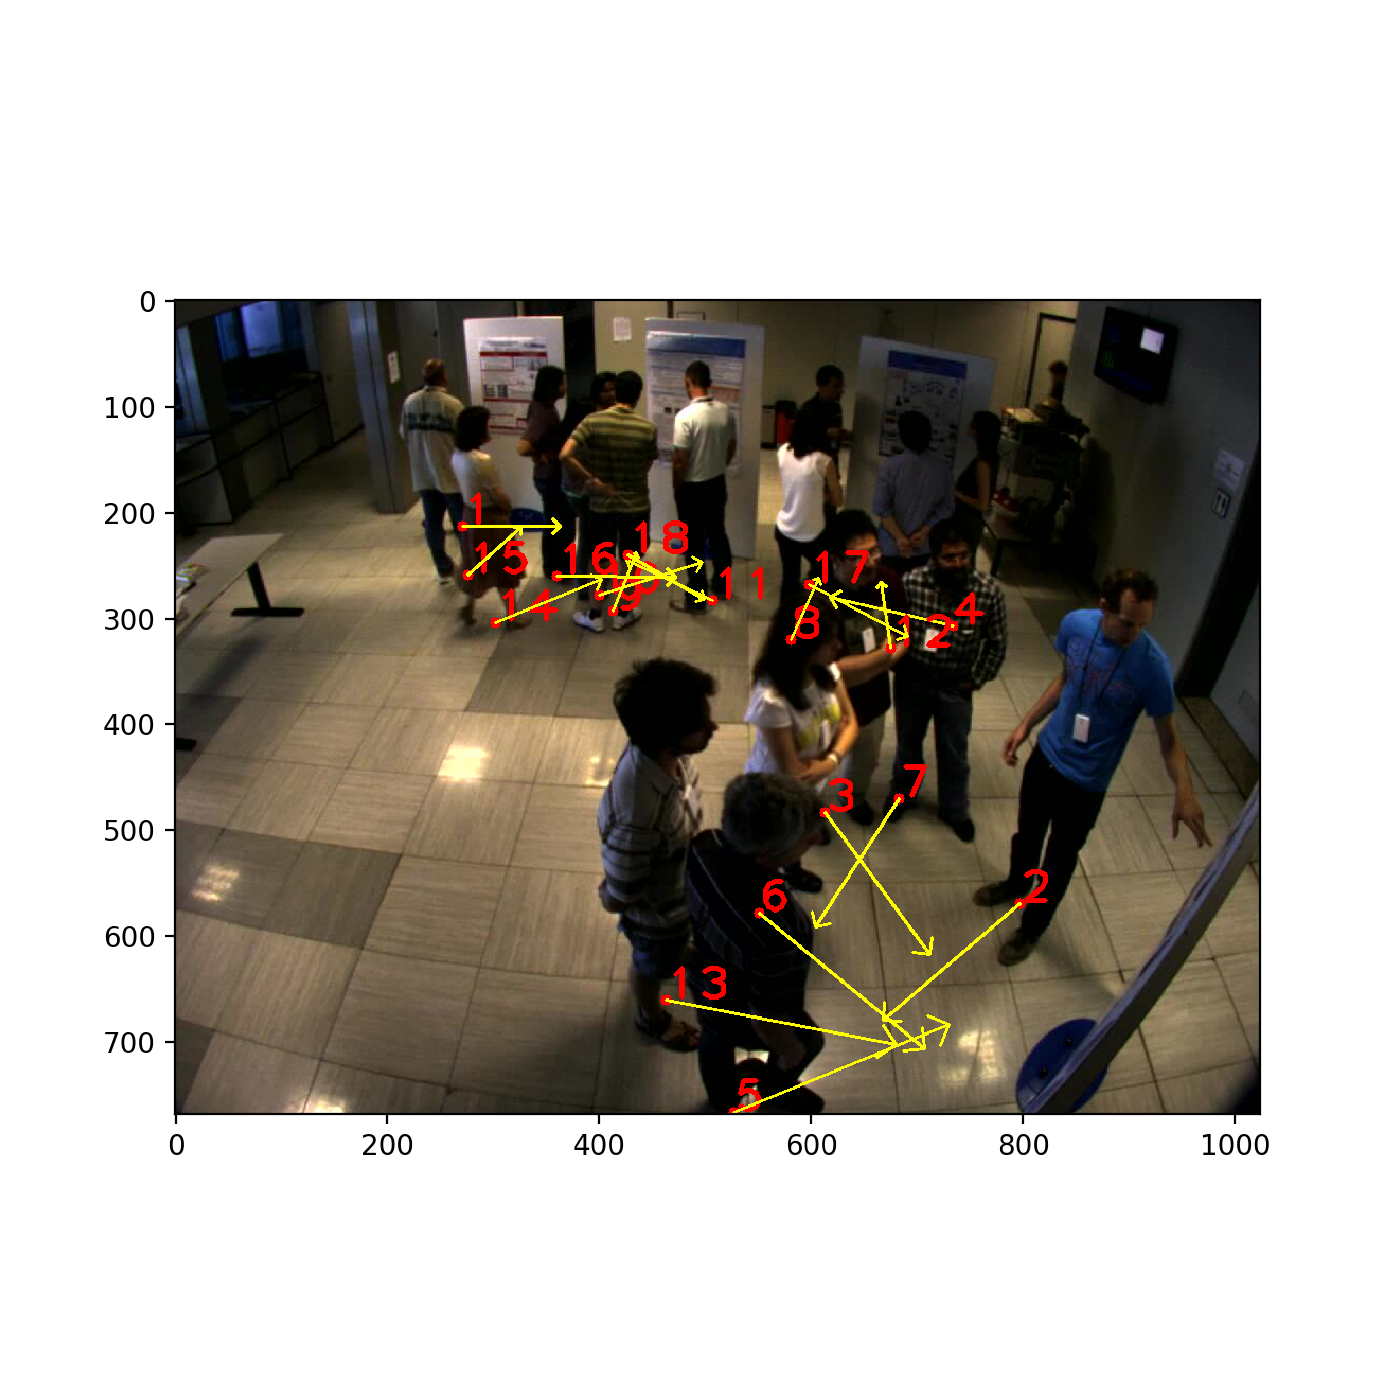

Body Orientation


<IPython.core.display.Javascript object>


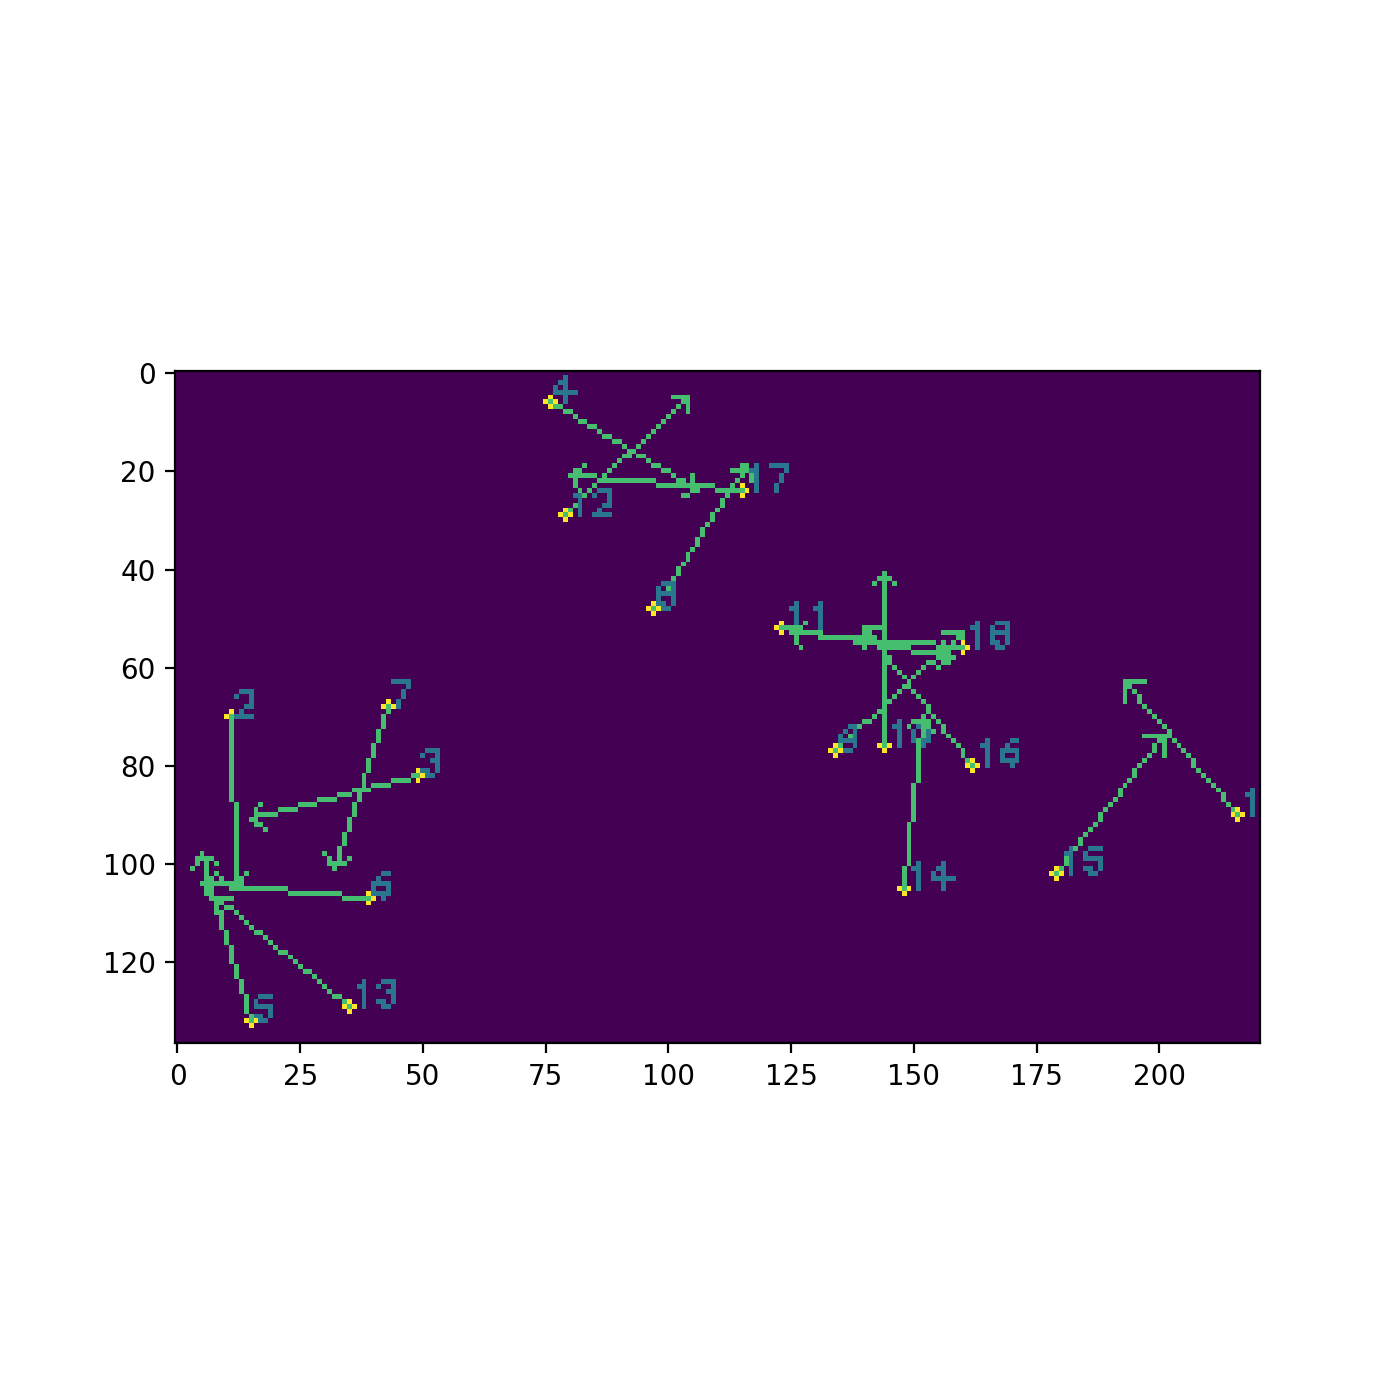

(255, 236) (323, 204)
(759, 195) (789, 230)
(682, 205) (768, 214)
(584, 147) (526, 160)
(813, 262) (799, 223)
(726, 231) (806, 229)
(687, 192) (740, 225)
(553, 176) (504, 157)
(465, 205) (403, 189)
(440, 206) (443, 176)
(490, 182) (408, 192)
(586, 162) (527, 148)
(758, 258) (801, 232)
(426, 238) (421, 202)
(342, 240) (300, 216)
(394, 213) (450, 185)
(507, 161) (581, 157)
(402, 191) (486, 184)


<IPython.core.display.Javascript object>


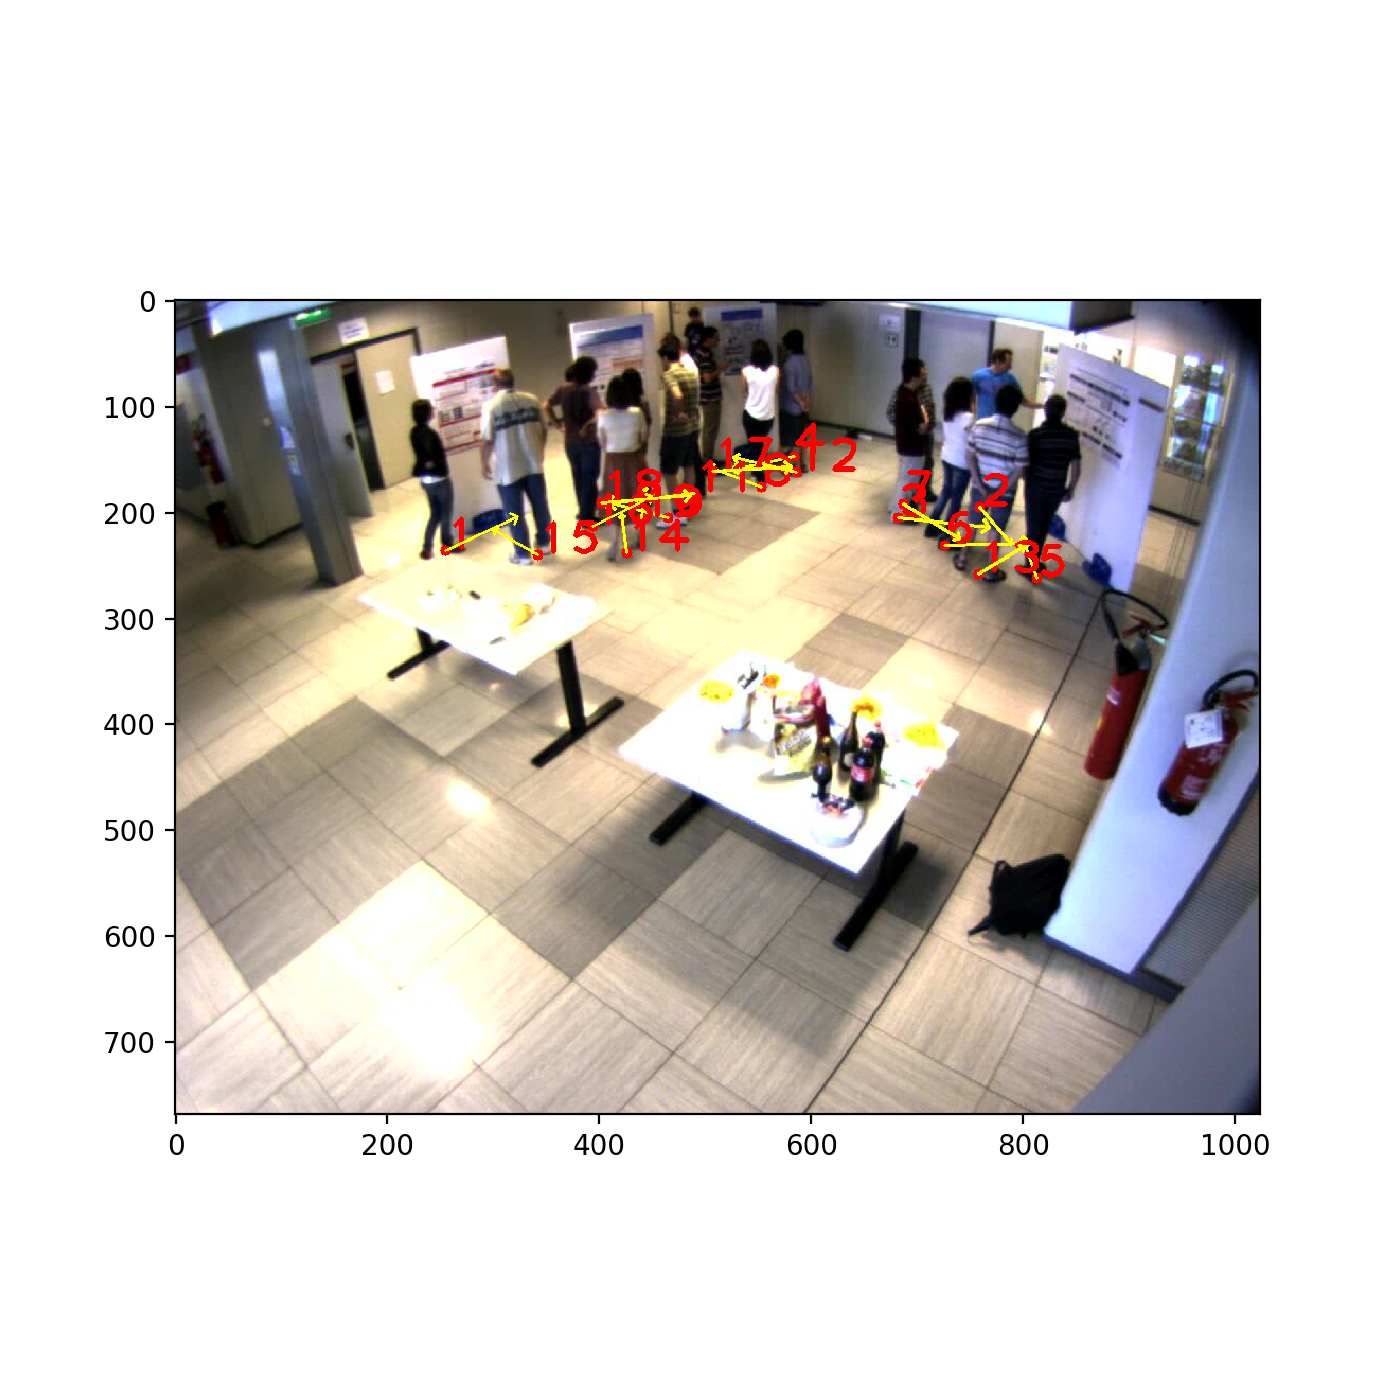

In [15]:
show = False
frameNum = 5 #totally 645 frames are annotated

for cam in Config.cameras_list:
    projM = RzTs[cam]
    for fid in range(3, 45*frameNum, 45):
        gt_line = (fid - 3) / 45 # 1 GT annotated for each 45 frames 
        body_frame = bodys[:,gt_line] # body orientation for all 18 participants in world coordinate in the frame
        head_frame = heads[:,gt_line] # head orientation
        Xs_frame = Xs_gt[:, gt_line] # position on ground floor
        Ys_frame = Ys_gt[:, gt_line]

        if gt_line%200 == 0:
            show = True
        
        vecBody = np.array([ [Xs_frame + np.cos(body_frame)], [Ys_frame + np.sin(body_frame)], np.zeros((1, len(Xs_frame))) ])
        vecBody = vecBody.reshape((3, -1))
        vecHead = np.array([ [Xs_frame + np.cos(head_frame)], [Ys_frame + np.sin(head_frame)], np.zeros((1, len(Xs_frame))) ])
        vecHead = vecHead.reshape((3, -1)) 
        Pos = np.array([ [Xs_frame], [Ys_frame], np.zeros((1, len(Xs_frame))) ])
        Pos = Pos.reshape((3, -1))
        if show and cam==0:
            g, p0, p1 = drawLib.drawLinesOnGround(Pos.transpose(), [vecBody.transpose()],35)
            plt.figure(figsize=(7,7))
            plt.imshow(g)
            plt.show()
        #project to cam_RzT coordinate
        vecBodyCamSpace =  geoFuncs.world2camRz(vecBody, projM)
        vecHeadCamSpace =  geoFuncs.world2camRz(vecHead, projM)
        PosCamSpace = geoFuncs.world2camRz(Pos, projM)
        #get angel from vector
        oriBody = vecBodyCamSpace - PosCamSpace
        angBody = geoFuncs.angle_rads( [1,0], oriBody[0:2].transpose() )
        oriHead = vecHeadCamSpace - PosCamSpace
        angHead = geoFuncs.angle_rads( [1,0], oriHead[0:2].transpose() )
        
        GTs_head_camSpace[cam, gt_line, :] = angHead
        GTs_body_camSpace[cam, gt_line, :] = angBody
        GTsX_camSpace[cam, gt_line, :] = PosCamSpace[0,:]
        GTsY_camSpace[cam, gt_line, :] = PosCamSpace[1,:]
        

        if show: #visualize
            print 'Body Orientation'
            ground, pts, epts = drawLib.drawLinesOnGround(PosCamSpace.transpose(), [vecBodyCamSpace.transpose()], 35)
            plt.figure(figsize=(7,7))
            plt.imshow(ground)
            plt.show()
    
            #project to img
            pos_img = proj2Img(Pos.transpose(), cam) #input pts should be NX3
            pos_img = pos_img.reshape(18,2)
            body_img = proj2Img(vecBody.transpose(), cam)
            body_img = body_img.reshape(18,2)
            #visualize in img
            rgbfilename = '../../../../../cvlabdata1/cvlab/datasets_people_tracking/SALSA/img/C%d/%08d.jpg'%(cam, fid)
            rgbImg = Image.open(rgbfilename)
            rgbImg = np.array(rgbImg)
            Hrgb,Wrgb = rgbImg.shape[0:2]
            rgb = copy.copy(rgbImg) 
            rgb = drawLib.drawLinesInImg(pos_img, body_img, rgb, (255,255,0), text=True)
            plt.figure(figsize=(7,7))
            plt.imshow(rgb)
            plt.show()
            
            show = False

In [13]:
#check if the data range is correct
print np.amin(GTs_body_camSpace), np.amax(GTs_body_camSpace)
print np.amin(GTs_head_camSpace), np.amax(GTs_head_camSpace)


-3.13798155956 3.10520374762
-3.13798155956 3.10520374762


In [49]:
#save GT files
GTs_body_camSpace = np.asarray(GTs_body_camSpace, dtype='float32')
np.save('./GT_orien/GT_body_camSpace.npy',GTs_body_camSpace)
GTs_head_camSpace = np.asarray(GTs_head_camSpace, dtype='float32')
np.save('./GT_orien/GT_head_camSpace.npy',GTs_head_camSpace)

In [54]:
GTsX_camSpace = np.asarray(GTsX_camSpace, dtype='float32')
np.save('./GT_orien/GT_Xs_camSpace.npy', GTsX_camSpace)
GTsY_camSpace = np.asarray(GTsY_camSpace, dtype='float32')
np.save('./GT_orien/GT_Ys_camSpace.npy', GTsY_camSpace)